In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd
from scipy import optimize
from scipy import stats
import csv

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

The function has 2 global minima in (x1,y1)=(-0.090,0.713) and (x2,y2)=(0.090,-0.713) and the value of the function is: -1.03163

When the initial guess is (0,0) the algorithm wrongly converges to (0,0).
This is because there exists some ε > 0 such that f(0,0) ≤ f(x,y) for all (x,y) within distance ε of (0,0).
But this is due to the fact that for the limited precision of python, for ε < 1.000000000000001e-161 f(x,y) is approximate to 0, so (0,0) is not a local minimum.

       fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


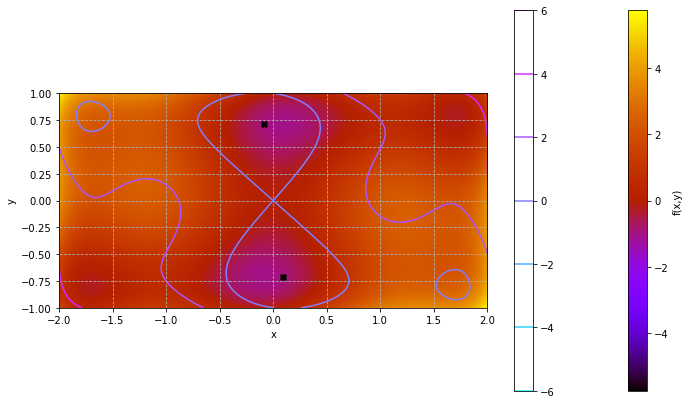

In [7]:
def fun(vec):
    x=vec[0]
    y=vec[1]
    f=(4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2
    return f


x=np.linspace(-2,2,1000)
y=np.linspace(-1,1,1000)



X,Y=np.meshgrid(x,y)
Z=fun([X,Y])
Zmin, Zmax = -np.abs(Z).max(), np.abs(Z).max()

fig,ax=plt.subplots(figsize=(12,7))


c=ax.imshow(Z, cmap ='gnuplot', vmin = Zmin, vmax = Zmax,
                 extent =[X.min(), X.max(), Y.min(), Y.max()])

c1=ax.contour(X,Y,Z, [-6,-4,-2,0,2,4,6], cmap='cool')

cbar=plt.colorbar(c)
cbar1=plt.colorbar(c1)
cbar.set_label("f(x,y)")
ax.set_xlabel("x")
ax.set_ylabel("y")

#1
minim1=optimize.minimize(fun, x0=[0,0.7])
minim2=optimize.minimize(fun, x0=[0,-0.7])
#2
if np.allclose(minim1["fun"], minim2["fun"]):
    print("The function has 2 global minima in (x1,y1)=({:.3f},{:.3f}) and (x2,y2)=({:.3f},{:.3f}) and the value of the function is: {:.5f}\n".format(minim1['x'][0], minim1['x'][1], minim2['x'][0], minim2['x'][1], minim1["fun"]))
#3
print("When the initial guess is (0,0) the algorithm wrongly converges to (0,0).")
print("This is because there exists some ε > 0 such that f(0,0) ≤ f(x,y) for all (x,y) within distance ε of (0,0).")
o=0.1
n=1
while fun([0.,0.])>fun([0.,o]):
    o=o/10
    n+=1
print("But this is due to the fact that for the limited precision of python, for ε < {} f(x,y) is approximate to 0, so (0,0) is not a local minimum.".format(o*10))


minim0=optimize.minimize(fun, x0=[0.,0.])
print("\n",minim0)

ax.scatter(minim1['x'][0], minim1['x'][1], marker="X", c='black')
ax.scatter(minim2['x'][0], minim2['x'][1], marker="X", c='black')
ax.grid(linestyle='--')



2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

For maximum temperatures: 

parameters:
 [10.58169955  6.72277482 27.94963537  0.09426337]
covariance matrix:
 [[ 1.68164420e-01  9.22461727e-04  6.55270609e-03 -1.36691377e-04]
 [ 9.22461727e-04  5.14155258e-03 -1.69803858e-03 -1.44975572e-05]
 [ 6.55270609e-03 -1.69803858e-03  1.83397249e-01  1.01902574e-03]
 [-1.36691377e-04 -1.44975572e-05  1.01902574e-03  1.13661461e-05]]

A = 10.6 +- 0.4
o = 6.7 +- 0.1
c = 27.9 +- 0.4
f = 0.094 +- 0.003 

For minimum temperatures: 

parameters:
 [ 25.14962021   7.13299513 -36.7125686    0.09570318]
covariance matrix:
 [[ 1.72807287e+00  9.03802303e-03  1.89189110e-01 -3.94968602e-05]
 [ 9.03802303e-03  9.05143291e-03 -1.65323766e-02 -5.98038244e-05]
 [ 1.89189110e-01 -1.65323766e-02  1.41860159e+00  2.54653480e-03]
 [-3.94968602e-05 -5.98038244e-05  2.54653480e-03  1.34431890e-05]]

A = 25 +- 1
o = 7.1 +- 0.1
c = -37 +- 1
f = 0.096 +- 0.004

For Tmax R=0.994
For Tmin R=0.989

Without errors associated to the data it is difficult to properly evalu

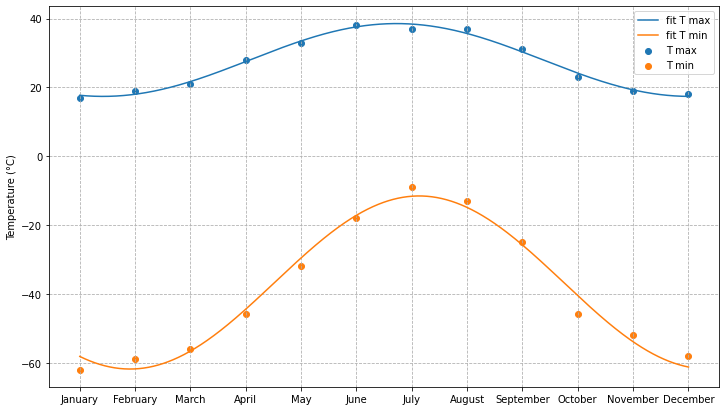

In [24]:
import calendar

months = [x for x in calendar.month_name[1:]]
m=np.arange(1,13,1)
Tmax=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

#1
fig, ax=plt.subplots(figsize=(12,7))
ax.grid(linestyle='--')
ax.scatter(m, Tmax, label="T max")
ax.scatter(m, Tmin, label="T min")
ax.set_ylabel("Temperature (°C)")
plt.xticks(m, months)

#2
def f(x, A, o, c,f):
    f=A*np.cos(2*math.pi*f*(x-o))+c
    return f

#3
print("For maximum temperatures: \n")
Mp, Mpcov = optimize.curve_fit(f, m, Tmax, p0=[10,7,20,1/11])
print("parameters:\n", Mp)
print("covariance matrix:\n", Mpcov)
print("\nA = %.1f +- %.1f" % (Mp[0], np.sqrt(Mpcov[0,0])))
print("o = %.1f +- %.1f" % (Mp[1], np.sqrt(Mpcov[1,1])))
print("c = %.1f +- %.1f" % (Mp[2], np.sqrt(Mpcov[2,2])))
print("f = %.3f +- %.3f \n" % (Mp[3], np.sqrt(Mpcov[3,3])))

print("For minimum temperatures: \n")
mp, mpcov = optimize.curve_fit(f, m, Tmin, p0=[30,7,-40,1/12])
print("parameters:\n", mp)
print("covariance matrix:\n", mpcov)
print("\nA = %.0f +- %.0f" % (mp[0], np.sqrt(mpcov[0,0])))
print("o = %.1f +- %.1f" % (mp[1], np.sqrt(mpcov[1,1])))
print("c = %.0f +- %.0f" % (mp[2], np.sqrt(mpcov[2,2])))
print("f = %.3f +- %.3f" % (mp[3], np.sqrt(mpcov[3,3])))

#4
X=np.linspace(1,12,1000)
ax.plot(X,f(X, Mp[0], Mp[1], Mp[2], Mp[3]), label="fit T max")
ax.plot(X,f(X, mp[0], mp[1], mp[2], mp[3]), label="fit T min")
ax.legend()

Ssr = np.sum((Tmax - f(m, Mp[0], Mp[1], Mp[2], Mp[3]))**2)
Tss = np.sum((np.mean(Tmax) - Tmax)**2)
Rsq = 1 - Ssr / Tss
print("\nFor Tmax R={:.3f}".format(math.sqrt(Rsq)))

ssr = np.sum((Tmin - f(m, mp[0], mp[1], mp[2], mp[3]))**2)
tss = np.sum((np.mean(Tmin) - Tmin)**2)
rsq = 1 - ssr / tss
print("For Tmin R={:.3f}".format(math.sqrt(rsq)))

print("\nWithout errors associated to the data it is difficult to properly evaluate the goodness of the fit.",
     "Graphically it seems reasonable and, looking also to the correlation coefficient, it is possible to note that for Tmax the function considered better fits the data.")

#5
comp=abs(Mp[1]-mp[1])/math.sqrt(mpcov[1,1]+Mpcov[1,1])
print("\nCompatibility of the offsets: {:.1f}".format(comp)) 

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [4]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ~/data/

parameters:
 [ 6.98066584e+02 -9.30442509e-02  2.67393830e-01]
covariance matrix:
 [[ 1.48698578e+03  6.08433680e-03 -2.39328368e-01]
 [ 6.08433680e-03  1.26749214e-04 -2.30967291e-06]
 [-2.39328368e-01 -2.30967291e-06  9.17506166e-05]]

A = 698 +- 39
m = -0.09 +- 0.01
s = 0.27 +- 0.01

chi2 = 695.8
p-value = 0.0


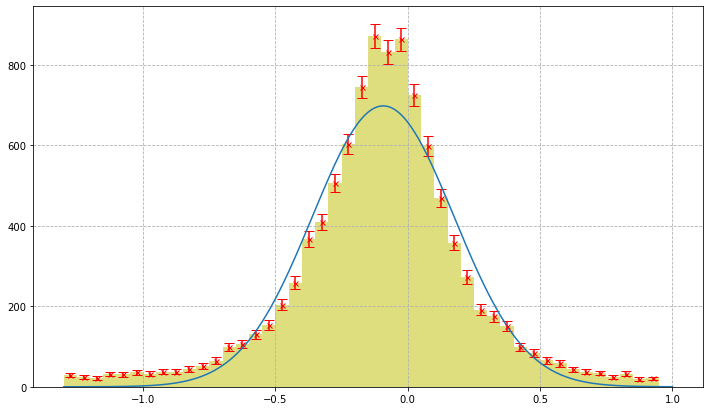

In [22]:
file_name="~/data/residuals_261.pkl"
data=pd.read_pickle(file_name).item()
data=pd.DataFrame(data)

#1
fig, ax=plt.subplots(figsize=(12,7))
binsarr=np.arange(-1.3,1,0.05)   #remove improbable data
histo=ax.hist(data['residuals'],bins=binsarr,alpha=0.5, color='y')
ax.grid(ls='--')

#2
n=histo[0]
p=histo[1][1]-histo[1][0]
b=[i+p/2 for i in histo[1][:-1]]
n_err=[math.sqrt(i) for i in n]
ax.errorbar(b, n, yerr=n_err, fmt='x', ms=5, c='r', capsize=5)

#3
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2/(2*s**2))   #aggiungere un +c


par, pcov = optimize.curve_fit(gauss, b, n, p0=[3000,-0.1,0.5], sigma=n_err)
print("parameters:\n", par)
print("covariance matrix:\n", pcov)
print("\nA = %.0f +- %.0f" % (par[0], np.sqrt(pcov[0,0])))
print("m = %.2f +- %.2f" % (par[1], np.sqrt(pcov[1,1])))
print("s = %.2f +- %.2f" % (par[2], np.sqrt(pcov[2,2])))

X=np.linspace(-1.3,1,500)
ax.plot(X, gauss(X, par[0], par[1], par[2]))


#4

chi2 = np.sum(((n - gauss(b, par[0], par[1], par[2]))**2)/n_err / n_err)
print("\nchi2 = {:.1f}".format(chi2))
ndof=len(b)-1  
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)
print("\nConsidering the p-value and the chi2 the fit is not apcettable.")
#fare con due gaussiane



4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [6]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P ~/data/

Best fit values of the parameters for f(x): 

a = -10.00 +- 0.12
b = -0.24 +- 0.01
c = 9.25 +- 0.09

The overall average temperature in Munich is: 9.25 ± 0.09

The typical daily average values predicted by the model for the coldest time of year is: 19.25 ± 0.15
The typical daily average values predicted by the model for the hottest time of year is: -0.74 ± 0.15

The parameter a has a negative value and the periodicity of the data is assumed to be equal to 1 year, so the parameter b gives us the information about the translation of the minimum temperature wrt the beginning of the year (and also of the maximum temperature wrt the middle of the year).

Best fit values of the parameters for g(x): 

a = -10.00 +- 0.12
b = 0.999 +- 0.001
c = 24 +- 17
d = 9.24 +- 0.09

RSS for f(x) is: 24678.63
RSS for g(x) is: 24672.38

Test f(x) vs g(x):
CL: 0.497 , additional parameter necessary: NO


<ipython-input-30-a18217308658>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data['days']>2008][data['days']<2013]


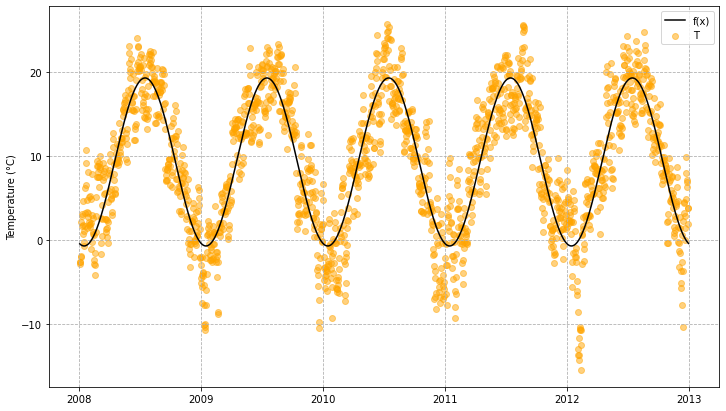

In [30]:
file_name='/home/eugenio/data/munich_temperatures_average_with_bad_data.txt'
data=pd.read_csv(file_name,sep=' ', header=None, names=['days', 'T'])
#remove improbable data
data=data[abs(data['T'])<90]
data=data[data['days']>2008][data['days']<2013]

days=data['days']
T=data['T']

#1
fig, ax=plt.subplots(figsize=(12,7))
ax.grid(linestyle='--')
ax.scatter(days, T, label="T", alpha=0.5, c='orange')
ax.set_ylabel("Temperature (°C)")
ax.set_xticks(np.arange(1994,2015,1))

def f(x, a,b,c):
    f=a*np.cos(2*math.pi*x+b)+c
    return f

par, pcov = optimize.curve_fit(f, days, T, p0=[-10,0,10])
print("Best fit values of the parameters for f(x): \n")
print("a = %.2f +- %.2f" % (par[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (par[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (par[2], np.sqrt(pcov[2,2])))



X=np.linspace(days.min(),days.max(),20000)
ax.plot(X, f(X, par[0], par[1], par[2]), c='black', label="f(x)")
ax.legend()


print("\nThe overall average temperature in Munich is: {:.2f} \u00B1 {:.2f}\n".format(par[2], np.sqrt(pcov[2,2])))


Mext=par[2]+abs(par[0])
mext=par[2]-abs(par[0])
Mext_err=math.sqrt(pcov[0,0]+pcov[2,2]-2*pcov[0,2])
mext_err=math.sqrt(pcov[0,0]+pcov[2,2]+2*pcov[0,2])

print("The typical daily average values predicted by the model for the coldest time of year is: {:.2f} \u00B1 {:.2f}".format(Mext, Mext_err))
print("The typical daily average values predicted by the model for the hottest time of year is: {:.2f} \u00B1 {:.2f}\n".format(mext, mext_err))

print("The parameter a has a negative value and the periodicity of the data is assumed to be equal to 1 year,",
     "so the parameter b gives us the information about the translation of the minimum temperature wrt the beginning of the year",
     "(and also of the maximum temperature wrt the middle of the year).")
#2

def g(x, a,b,c,d):
    g=a*np.cos(2*math.pi*b*x+c)+d
    return g

Par, Pcov = optimize.curve_fit(g, days, T)
print("\nBest fit values of the parameters for g(x): \n")
print("a = %.2f +- %.2f" % (Par[0], np.sqrt(Pcov[0,0])))
print("b = %.3f +- %.3f" % (Par[1], np.sqrt(Pcov[1,1])))
print("c = %.0f +- %.0f" % (Par[2], np.sqrt(Pcov[2,2])))
print("d = %.2f +- %.2f" % (Par[3], np.sqrt(Pcov[3,3])))

#ax.plot(X, g(X, Par[0], Par[1], Par[2], Par[3]), c='red', label="g(x)")


ssr = np.sum((T-f(days, par[0], par[1], par[2]))**2)
Ssr = np.sum((T-g(days, Par[0], Par[1], Par[2], Par[3]))**2)
ndof=3-1
Ndof=4-1
N=len(T)

print("\nRSS for f(x) is: {:.2f}". format(ssr))
print("RSS for g(x) is: {:.2f}". format(Ssr))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

print("\nTest f(x) vs g(x):")
cl_1_vs_2 = Ftest(ssr, Ssr, ndof, Ndof, N, verbose=True)